In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [32]:
def trade_bucket(startDate='2017-01-01'):
    start = 0
    df = pd.DataFrame()
    data = True
    counter = 1
    
    while data:
        api_call_url = 'https://www.bitmex.com/api/v1/trade/bucketed?binSize=1d&partial=false&symbol=XBTUSD&count=1000&start=' + str(
                       start) +'&reverse=true&startTime=' + startDate
        r = requests.get(api_call_url)
        if r.status_code != 200:
            r.raise_for_status()
        data = r.json()
        if data:
            temp_df = pd.DataFrame(data)
            df = df.append(temp_df)
            start += 1000
        if counter < 30:
            counter += 1
        else:
            sleep(60)
            counter = 1
    df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
    df.set_index('timestamp', inplace=True)
    return df

In [33]:
trade_df = trade_bucket()

In [34]:
trade_df['percent_change'] = 100*trade_df['open'].pct_change()

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2F253A48>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2F32EA08>]],
       dtype=object))

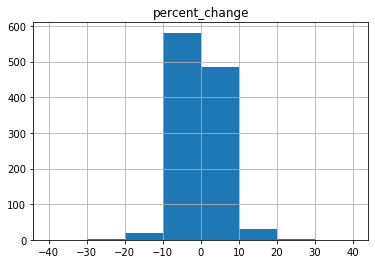

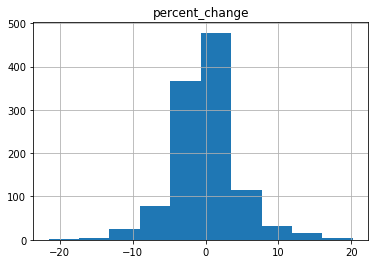

In [35]:
pd.DataFrame.hist(trade_df, column=['percent_change'],bins=[-40,-30,-20,-10,0,10,20,30,40]), pd.DataFrame.hist(trade_df, column=['percent_change'])

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2DF85908>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2F3C6248>]],
       dtype=object))

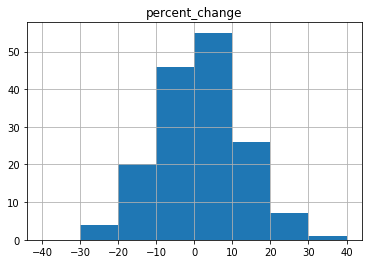

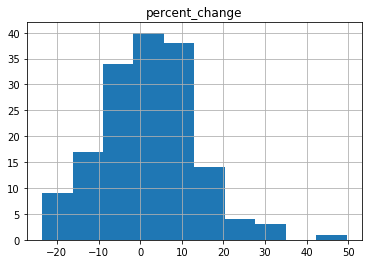

In [36]:
trade_week_df = trade_df.resample('W', convention='start').pad()
trade_week_df['percent_change'] = 100*trade_week_df['open'].pct_change()
pd.DataFrame.hist(trade_week_df, column=['percent_change'],bins=[-40,-30,-20,-10,0,10,20,30,40]), pd.DataFrame.hist(trade_week_df, column=['percent_change'])

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2F5D38C8>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F2F6DD748>]],
       dtype=object))

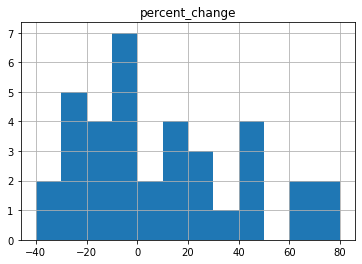

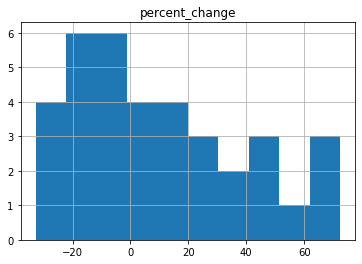

In [39]:
trade_month_df = trade_df.resample('M', convention='start').pad()
trade_month_df['percent_change'] = 100*trade_month_df['open'].pct_change()
pd.DataFrame.hist(trade_month_df, column=['percent_change'],bins=[-40,-30,-20,-10,0,10,20,30,40,50,60,70,80]), pd.DataFrame.hist(trade_month_df, column=['percent_change'])